# DSC PJATK Car Price Prediction — Final Presentation

**Cyprian i Jakub:**  
- Grupa 7

## 1. Wprowadzenie
Witamy w naszej prezentacji rozwiązania konkursowego organizowanego przez **DSC PJATK**. Naszym zadaniem było przygotowanie **modelu predykcyjnego** do przewidywania cen pojazdów na podstawie danych z ofert sprzedaży.

**Kluczowe etapy pracy:**
1. Eksploracyjna analiza danych (EDA)
2. Czyszczenie i inżynieria cech (feature engineering)
3. Budowa i ocena modelu
4. Wnioski i rekomendacje

# A. Analiza i Wizualizacje (EDA + Wnioski)

## 2. Eksploracyjna Analiza Danych
W tej części koncentrujemy się na:
- Wczytaniu danych
- Podstawowych statystykach opisowych
- Identyfikacji braków w danych i wartości odstających
- Prostej wizualizacji rozkładów i zależności

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

sns.set(style="whitegrid")

# Wczytanie danych
df_train = pd.read_csv("Cleaned_train.csv", index_col="ID")  # przykładowa nazwa
df_test  = pd.read_csv("Cleaned_test.csv", index_col="ID")   # przykładowa nazwa
print("Rozmiary zbioru treningowego:", df_train.shape)
df_train.head()

Rozmiary zbioru treningowego: (135397, 116)


,Cena,Waluta,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Kraj_pochodzenia,...,SUV,city_cars,compact,convertible,coupe,minivan,sedan,small_cars,station_wagon,Kierownica_strona
ID,,,,,,,,,,,,,,,,,,,,,
1,13900.0,1,Renault,Grand Espace,Gr 2.0T 16V Expression,2005.0,213000.0,170.0,1998.0,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,25900.0,1,Renault,Megane,1.6 16V 110,2010.0,117089.0,110.0,1598.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,35900.0,1,Opel,Zafira,Tourer 1.6 CDTI ecoFLEX Start/Stop,2015.0,115600.0,136.0,1598.0,Denmark,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,5999.0,1,Ford,Focus,1.6 TDCi FX Silver / Silver X,2007.0,218000.0,90.0,1560.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,44800.0,1,Toyota,Avensis,1.8,2013.0,NaN,NaN,1798.0,Poland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### 2.1 Statystyki opisowe

In [3]:
# Podstawowe statystyki opisowe
df_train.describe(include="all")

,Cena,Waluta,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Kraj_pochodzenia,...,SUV,city_cars,compact,convertible,coupe,minivan,sedan,small_cars,station_wagon,Kierownica_strona
count,1.353970e+05,135397.000000,132046,132088,87336,125572.000000,1.313940e+05,131664.000000,130711.000000,74977,...,135397.000000,135397.000000,135397.000000,135397.000000,135397.000000,135397.000000,135397.000000,135397.000000,135397.000000,135397.000000
unique,NaN,NaN,102,1139,16014,NaN,NaN,NaN,NaN,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Volkswagen,Astra,2.0 TDI,NaN,NaN,NaN,NaN,Poland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,11692,3331,596,NaN,NaN,NaN,NaN,36122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.306938e+04,0.948913,NaN,NaN,NaN,2012.090251,1.531563e+05,151.716696,1881.811753,NaN,...,0.195122,0.112853,0.149848,0.011692,0.029927,0.103577,0.155173,0.028132,0.188867,0.001086
std,8.807748e+04,0.313601,NaN,NaN,NaN,6.996779,3.421378e+06,77.386471,727.605417,NaN,...,0.396296,0.316415,0.356924,0.107494,0.170386,0.304712,0.362071,0.165351,0.391404,0.032932
min,5.850000e+02,-1.000000,NaN,NaN,NaN,1923.000000,1.000000e+00,1.000000,400.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.780000e+04,1.000000,NaN,NaN,NaN,2008.000000,5.300000e+04,105.000000,1461.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.580000e+04,1.000000,NaN,NaN,NaN,2013.000000,1.448635e+05,136.000000,1798.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.599000e+04,1.000000,NaN,NaN,NaN,2017.000000,2.060000e+05,173.000000,1997.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 2.2 Rozkład wybranych zmiennych
Poniżej przykład prostych wykresów przedstawiających rozkład rocznika produkcji i zależność między przebiegiem a ceną.

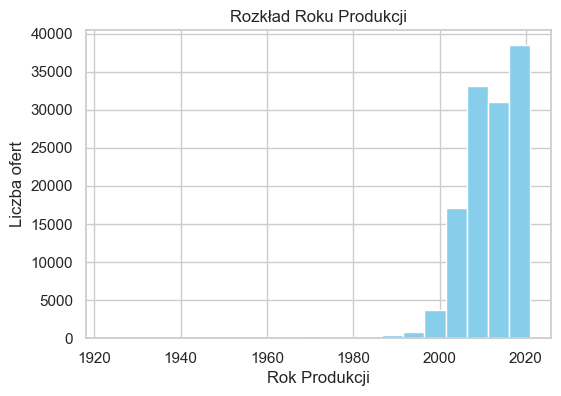

In [4]:
# Rozkład roku produkcji
plt.figure(figsize=(6,4))
df_train["Rok_produkcji"].hist(bins=20, color='skyblue')
plt.title("Rozkład Roku Produkcji")
plt.xlabel("Rok Produkcji")
plt.ylabel("Liczba ofert")
plt.show()

#### Interpretacja:
- Większość pojazdów pochodzi z lat 2000–2020.
- Możliwe, że dane dotyczą nowszych aut.

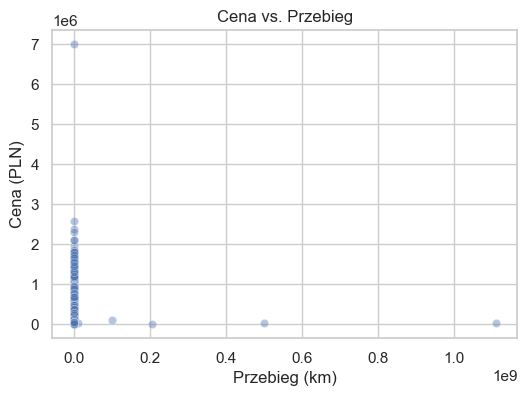

In [5]:
# Cena vs. Przebieg
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_train, x="Przebieg_km", y="Cena", alpha=0.4)
plt.title("Cena vs. Przebieg")
plt.xlabel("Przebieg (km)")
plt.ylabel("Cena (PLN)")
plt.show()

#### Interpretacja:
- Widzimy dość **ujemną korelację** między przebiegiem a ceną.
- Wyższy przebieg zwykle oznacza niższą cenę.

### 2.3 Braki w Danych i Wartości Odstające
- Sprawdzaliśmy uzupełnianie braków (np. średnia, mediana, tryb).
- Ewentualne wartości odstające (np. bardzo wysokie ceny) były rozważane pod kątem obcięcia (1–99 percentile).

## 3. Wnioski z EDA
1. **Marka** ma duże znaczenie – marki premium (np. Audi, BMW) osiągają wyższe ceny.
2. **Rok produkcji** dodatnio koreluje z ceną (nowsze auta są droższe).
3. **Przebieg** jest jedną z kluczowych cech obniżających wartość.

Z tymi wnioskami przechodzimy do części dotyczącej modelowania.

# B. Modelowanie + Wnioski

## 4. Przygotowanie Zbioru Treningowego
- Zakładamy, że plik `Cleaned_train.csv` zawiera już dane po wstępnym czyszczeniu i inżynierii cech.
- Dzielimy dane na cechy (X) i etykietę (Cena).

In [6]:
df_train_cleaned = df_train.copy()

# Wybieramy wszystkie kolumny poza "Cena" jako cechy
X_all = df_train_cleaned.drop(columns=["Cena"], errors='ignore')
y_all = df_train_cleaned["Cena"]

X_train_l, X_val_l, y_train_l, y_val_l = train_test_split(
    X_all, 
    y_all, 
    test_size=0.2,
    random_state=42
)

print("Rozmiar zbioru treningowego:", X_train_l.shape)
print("Rozmiar zbioru walidacyjnego:", X_val_l.shape)

Rozmiar zbioru treningowego: (108317, 115)
Rozmiar zbioru walidacyjnego: (27080, 115)


## 5. Budowa i Ocena Modelu
Testowaliśmy kilka algorytmów, m.in. Random Forest, XGBoost.  
Poniżej przykład z **XGBoost** 

In [8]:
# Parametry specyficzne dla GPU
param_grid_restricted = {
    # 21 min
    "n_estimators": [200],  # Zamiast [50, 100, 200, 300]
    "max_depth": [7],  # Zamiast [3, 5, 7, 9]
    "learning_rate": [0.05],  # Zamiast [0.01, 0.05, 0.1, 0.2]
    "subsample": [1],  # Zamiast [0.6, 0.8, 1.0]
    "colsample_bytree": [0.8],  # Zamiast [0.6, 0.8, 1.0]
    "gamma": [0],  # Zamiast [0, 0.1, 0.2]
    "reg_alpha": [0.1],  # Zamiast [0, 0.1, 1]
    "reg_lambda": [0.1],  # Zamiast [0, 0.1, 1]
}
params = {
    "tree_method": "hist",  # Użyj GPU do budowy drzew
    "objective": "reg:squarederror",  # Zadanie regresji
    "eval_metric": "rmse",  # Metryka RMSE
    "gpu_id": 0,  # Użyj GPU o indeksie 0
    "predictor": "gpu_predictor",  # Użyj GPU do predykcji
}

# Inicjalizacja modelu XGBRegressor z parametrami GPU
xgb = XGBRegressor(**params, enable_categorical=True, random_state=42)

# Konfiguracja Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_restricted,
    scoring="neg_mean_squared_error",  # Metryka do optymalizacji (RMSE)
    cv=5,  # 5-krotna walidacja krzyżowa
    n_jobs=1,  # Użyj wszystkich dostępnych rdzeni CPU
    verbose=2,  # Wyświetl postęp
)

# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_grid,
#     n_iter=50,  # Przetestuj tylko 50 losowych kombinacji
#     scoring="neg_mean_squared_error",
#     cv=5,
#     n_jobs=-1,
#     verbose=2,
#     random_state=42,
# )

# Trenowanie modelu z Grid Search
grid_search.fit(X_train, y_train)

# Najlepsze parametry i wynik
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepszy wynik (Negative MSE):", grid_search.best_score_)

# Ocena modelu na zbiorze testowym
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE na zbiorze testowym: {rmse}")
print(f"R² na zbiorze testowym: {r2}")

**Uwagi:**
- Dodatkowe strojenie hiperparametrów (GridSearchCV, RandomizedSearchCV, Optuna) pozwoliłoby zredukować błąd.
- Uzyskane ~19k RMSE (np. 19107.78) jest naszym punktem odniesienia.

### 5.1 Zapis Ostatecznych Wyników
Po wybraniu najlepszego modelu używamy go do przewidzenia cen w zbiorze testowym.

In [8]:
# Przygotowanie zbioru testowego (analogiczne preprocessing)
df_test_cleaned = df_test.copy()

X_test_final = df_test_cleaned.drop(columns=["Cena"], errors='ignore')

# Predykcja
y_pred_test = xgb_model.predict(X_test_final)

# Tworzenie pliku submission
submission = pd.DataFrame({
    "ID": df_test_cleaned.index,
    "Cena": y_pred_test
})
submission.to_csv("submission.csv", index=False)
print("Zapisano plik submission.csv")

## 6. Największe Wyzwania i Jak Sobie z Nimi Poradziliśmy
1. **Braki w danych** – Imputacja (średnia/mediana/najczęstsza kategoria).
2. **Różne waluty** – Konwersja na PLN (jeśli występowało EUR, itp.).
3. **Wartości odstające** – Rozważenie usunięcia lub obcięcia (1–99 percentyl).
4. **Wybór cech** – Marka, rok produkcji i przebieg okazały się kluczowe.

## 7. Podsumowanie i Wnioski
- **Model:** Użyliśmy algorytmu gradient boosting (XGBoost) z parametrami dopasowanymi do danych.
- **RMSE:** Wartość na walidacji ~19k PLN. Możliwe dalsze usprawnienia przez bardziej rozbudowaną inżynierię cech.
- **Przydatność:** Tego typu model może pomagać dealerom w szybszym i bardziej trafnym szacowaniu cen.

### Możliwe dalsze kroki
- Łączenie modeli w stacking/ensemble.

## Dziękujemy za uwagę!